**Train Random Forest Model**

1. import Python packages and training data

In [1]:
# adding required libraries
import pandas as pd
import numpy as np

2. Load the dataset for model training

In [2]:
# Load the data from csv
x_data_org =pd.read_csv('../data/interim/x_data_org.csv')
y_data_org =pd.read_csv('../data/interim/y_data_org.csv')
x_data_eda =pd.read_csv('../data/interim/x_data.csv')
y_data_eda =pd.read_csv('../data/interim/y_data.csv')
x_balanced_data =pd.read_csv('../data/interim/x_balanced_data.csv')
y_balanced_data =pd.read_csv('../data/interim/y_balanced_data.csv')

x_test_org =pd.read_csv('../data/interim/x_test_org.csv')
y_test_org =pd.read_csv('../data/interim/y_test_org.csv')
x_test_eda =pd.read_csv('../data/interim/x_test.csv')
y_test_eda =pd.read_csv('../data/interim/y_test.csv')
x_balanced_test =pd.read_csv('../data/interim/x_balanced_test.csv')
y_balanced_test =pd.read_csv('../data/interim/y_balanced_test.csv')


3. Set up baseline model

In [5]:
# find the most occuring value and use it as base model
y_mode = y_data_org.mode()
y_shape = (len(x_data_org), 1)
y_base = np.full(y_shape, y_mode)

In [7]:
# calculate the accuracy score of the base model
from sklearn.metrics import accuracy_score
accuracy_score(y_data_org, y_base)

0.833125

4. Train and evaluate Kmeans model

In [9]:
from sklearn.cluster import KMeans
datasets = [(x_data_org, y_data_org, x_test_org, y_test_org), (x_data_eda, y_data_eda, x_test_eda, y_test_eda), (x_balanced_data, y_balanced_data, x_balanced_test, y_balanced_test)]
models = []

for i, (x, y, x_test, y_test) in enumerate(datasets):
    kmeans_model = KMeans(random_state=1, n_clusters=2)
    kmeans_model.fit(x)
    models.append(kmeans_model)
    print(f'KMeans training score for dataset {i+1}: {accuracy_score(y, kmeans_model.predict(x))}')
    print(f'KMeans test score for dataset {i+1}: {accuracy_score(y_test, kmeans_model.predict(x_test))}')
    print('\n')

# Accessing the models
kmeans_model_org = models[0]
kmeans_model_over = models[1]
kmeans_model_under = models[2]

KMeans training score for dataset 1: 0.54171875
KMeans test score for dataset 1: 0.54375


KMeans training score for dataset 2: 0.45526675786593707
KMeans test score for dataset 2: 0.45076586433260396


KMeans training score for dataset 3: 0.6215978928884986
KMeans test score for dataset 3: 0.6491228070175439




6. Conclusion
This model cannot provide accurate prediction base on the dataset.

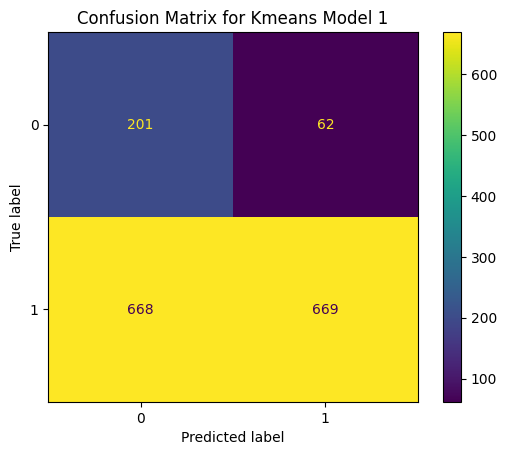

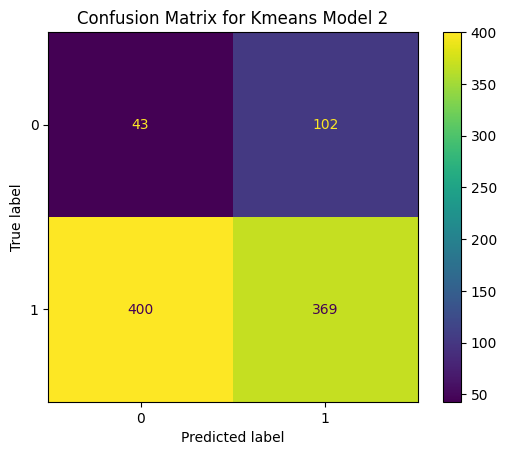

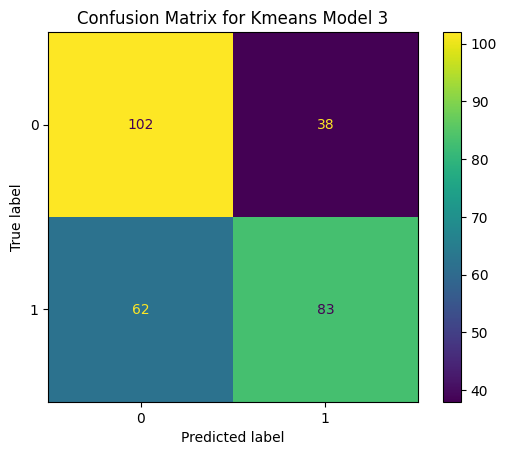

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate each model using ConfusionMatrixDisplay
for i, (x, y, x_test, y_test) in enumerate(datasets):
    model = models[i]
    y_pred = model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'Confusion Matrix for Kmeans Model {i+1}')
    plt.show()

7. Export Model

In [15]:
import joblib

# Export the Random Forest model
joblib.dump(kmeans_model_under, '../models/kmeans_model.pkl')

['../models/kmeans_model.pkl']